In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/dataset/tomato')
os.listdir()

['cnn_train.py', 'train', 'val']

Image Preprocessing

Importing the Libraries

In [3]:
import os
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

Configure ImageDataGenerator Class

In [4]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
datagen2=keras.preprocessing.image.ImageDataGenerator(rescale=1/255)


Applying ImageDataGenerator Functinality To Train Set,Validation and Test Set

In [5]:
#Training and validation dataset

train = datagen.flow_from_directory('./train',seed=123, subset='training')
val =datagen.flow_from_directory('./train',seed=123, subset='validation')

#Test dataset for evaluation
test =datagen2.flow_from_directory('./val')

Found 7035 images belonging to 10 classes.
Found 3015 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


Preview of Images

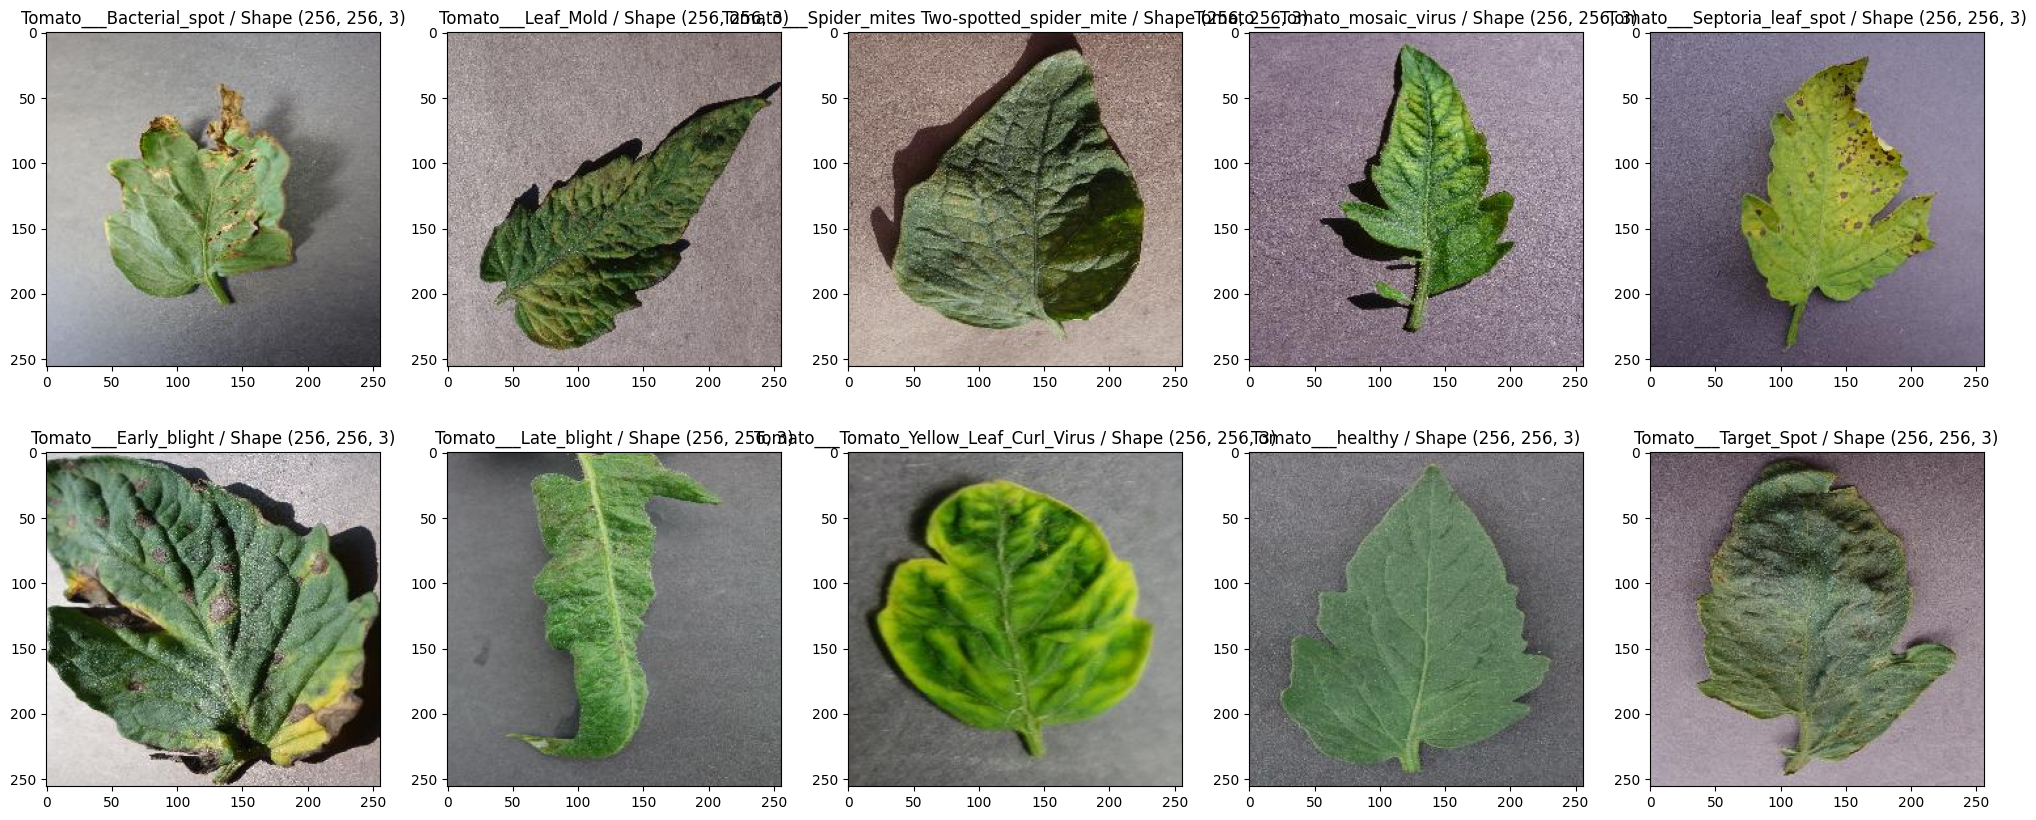

In [6]:
#Training data visualization

classes= os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate (classes):
    pic=os.listdir('./train/'+i[1])[0]
    image=Image.open('./train/' +i[1]+ '/' +pic)
    image=np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape {1}'. format(i[1], image.shape))
    plt.imshow(image)
plt.show()

Model Building

In [7]:
def get_model():
   base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
   for layers in base_model.layers[:140]:
       layers.trainable = False
   for layers in base_model.layers [140:]:
       layers.trainable = True
   x = base_model.output
   x = GlobalAveragePooling2D()(x)
   x = Dense (1000, activation='relu')(x)
   pred=Dense(10, activation='softmax')(x)
   model = Model(inputs=base_model.input, outputs=pred)
   return model

In [8]:
model=get_model()
model.summary()

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 60,390,658 (230.37 MB)

 Trainable params: 56,430,338 (215.26 MB)

 Non-trainable params: 3,960,320 (15.11 MB)

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Train the Model

In [10]:
model.fit(train, batch_size=80,epochs=15,validation_data=val)

Epoch 1/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 2918s 13s/step - accuracy: 0.6506 - loss: 1.1542 - val_accuracy: 0.9522 - val_loss: 0.1507
Epoch 2/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 162s 669ms/step - accuracy: 0.9753 - loss: 0.0923 - val_accuracy: 0.9619 - val_loss: 0.1145
Epoch 3/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 202s 668ms/step - accuracy: 0.9949 - loss: 0.0271 - val_accuracy: 0.9725 - val_loss: 0.0901
Epoch 4/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 147s 664ms/step - accuracy: 0.9974 - loss: 0.0137 - val_accuracy: 0.9745 - val_loss: 0.0769
Epoch 5/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 147s 665ms/step - accuracy: 0.9980 - loss: 0.0099 - val_accuracy: 0.9715 - val_loss: 0.0885
Epoch 6/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 168s 758ms/step - accuracy: 0.9988 - loss: 0.0068 - val_accuracy: 0.9731 - val_loss: 0.0838
Epoch 7/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 183s 672ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9718 - val_loss: 0.0855
Epoch 8/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 147s 664ms/step - accuracy: 0.9995 - 

In [11]:
model.evaluate(test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 300s 10s/step - accuracy: 0.9616 - loss: 0.1278


[0.14101453125476837, 0.9610000252723694]

Test the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


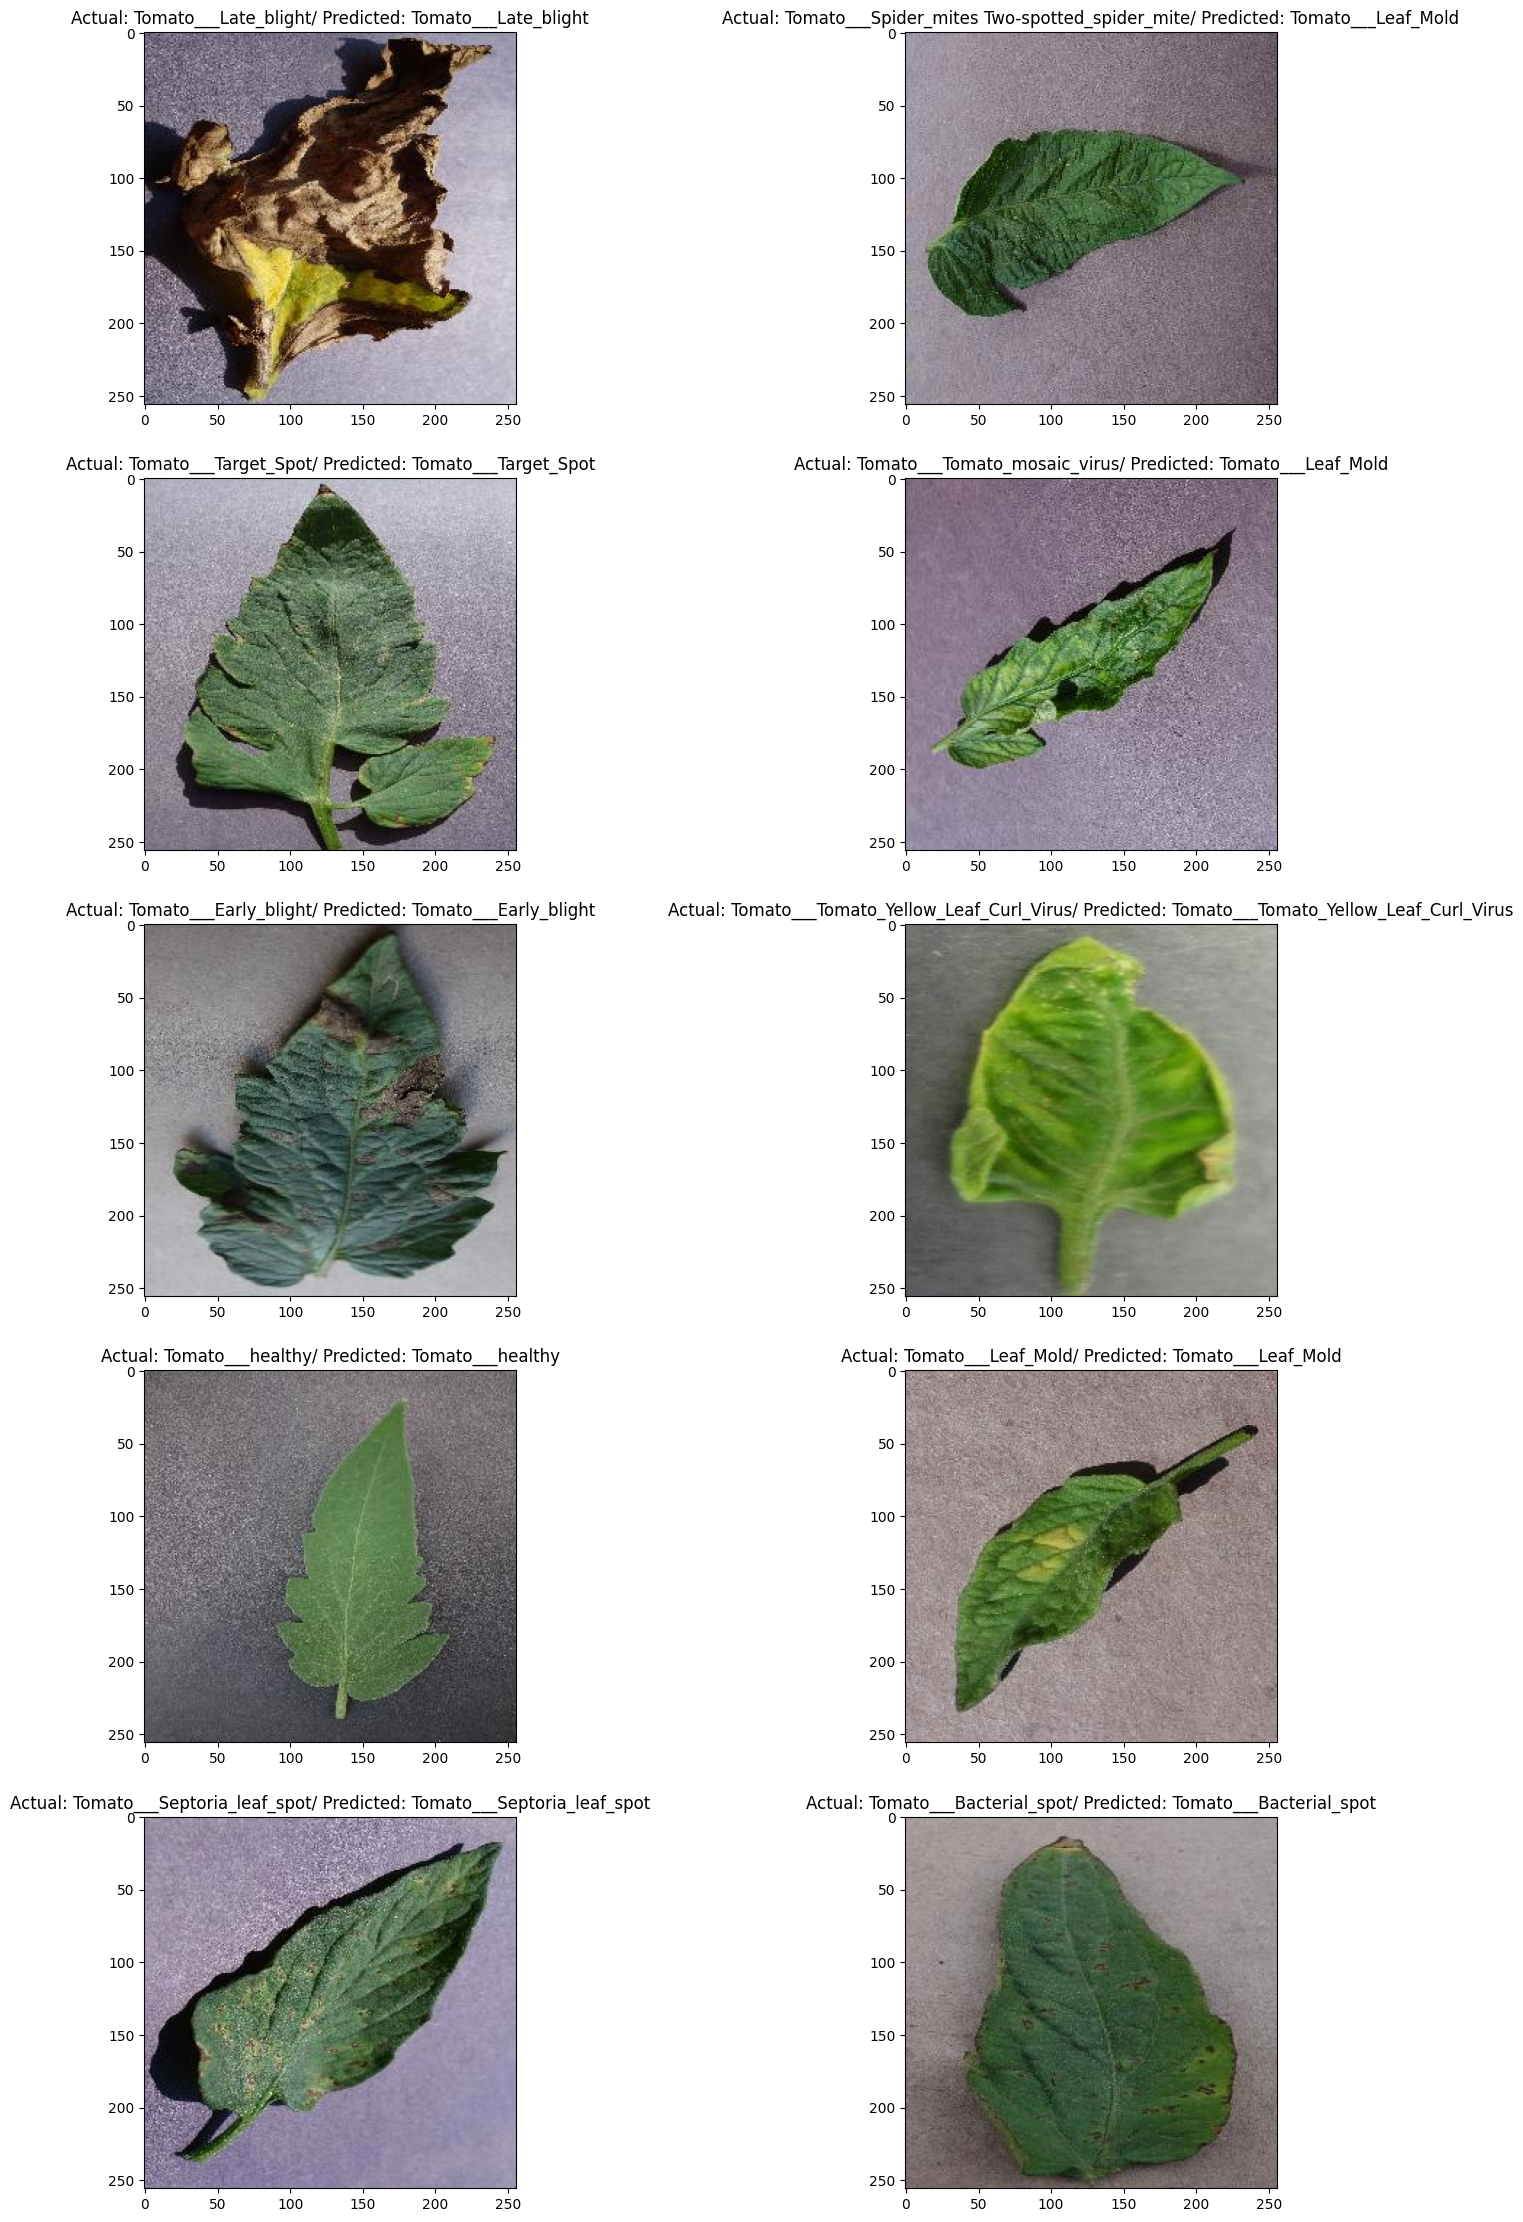

In [12]:
#Prediction and visualizations

classes = os.listdir('./val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):

   pic = os.listdir('./val/'+i[1])

   pic = pic[np.random.randint(len(pic)-1)]

   image = Image.open('./val/' +i[1]+'/'+pic)

   image = np.asarray(image)

   pred = np.argmax(model.predict(image.reshape(-1,256,256,3)/255))
   for j in list(enumerate(list(test.class_indices.keys()))):
         if pred == j[0]:
              prediction = j[1]
   plt.subplot(5,2,i[0]+1)

   plt.title('Actual: {0}/ Predicted: {1}'. format(i[1], prediction))

   plt.imshow(image)

plt.show()

Save the Model

In [13]:
from tensorflow.keras.models import load_model

# Saving the model
model.save('tmt.keras')

# Loading the model
model = load_model('tmt.keras')

In [14]:
import pickle
model_file ="model.pickle"
with open(model_file,'wb') as f:
    pickle.dump(model, f)

In [15]:
import joblib
import os
joblib.dump(model, 'tmt.joblib')

['tmt.joblib']